In [1]:
import re

text = "Hello World! NLP is great. Let's learn it together."
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
print(cleaned_text)  # hello world nlp is great lets learn it together


hello world nlp is great lets learn it together


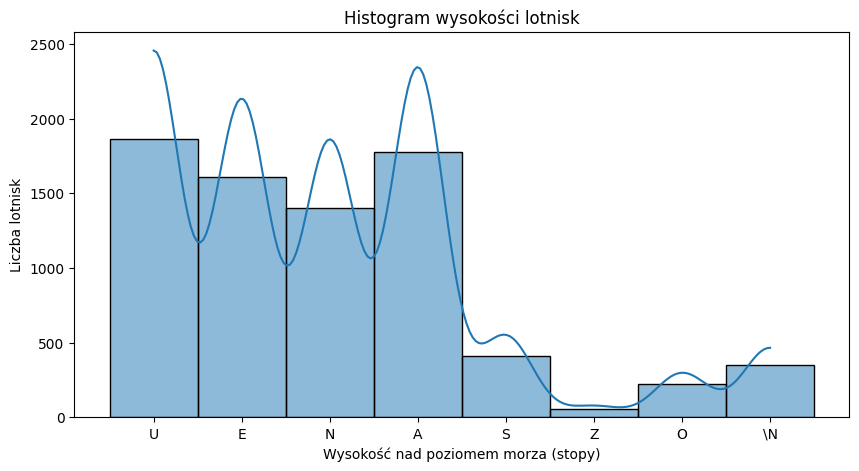

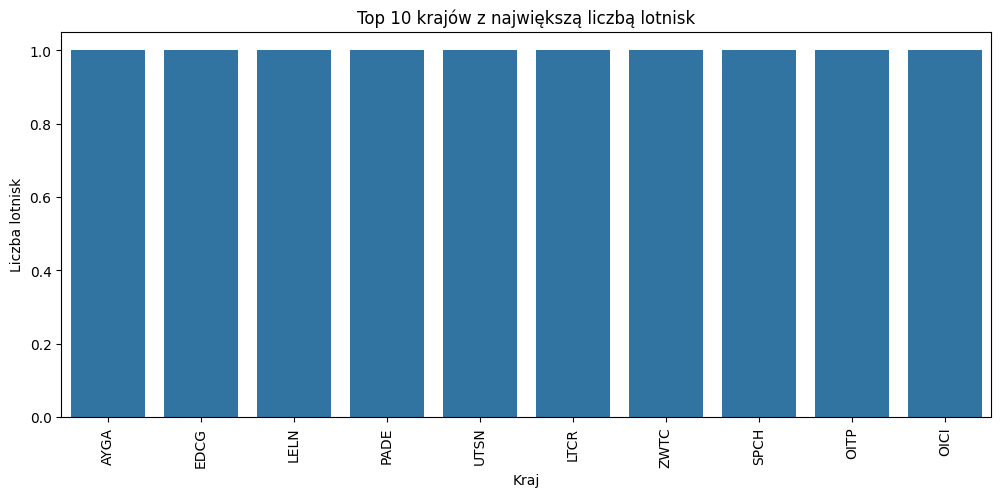

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO


url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"
response = requests.get(url)


df = pd.read_csv(StringIO(response.text), header=None, names=[
    "Airport ID", "Name", "City", "Country", "IATA", "ICAO",
    "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database time zone"
])


plt.figure(figsize=(10, 5))
sns.histplot(df['Altitude'], bins=50, kde=True)
plt.title("Histogram wysokości lotnisk")
plt.xlabel("Wysokość nad poziomem morza (stopy)")
plt.ylabel("Liczba lotnisk")
plt.show()


top_countries = df["Country"].value_counts().nlargest(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 krajów z największą liczbą lotnisk")
plt.xlabel("Kraj")
plt.ylabel("Liczba lotnisk")
plt.xticks(rotation=90)
plt.show()


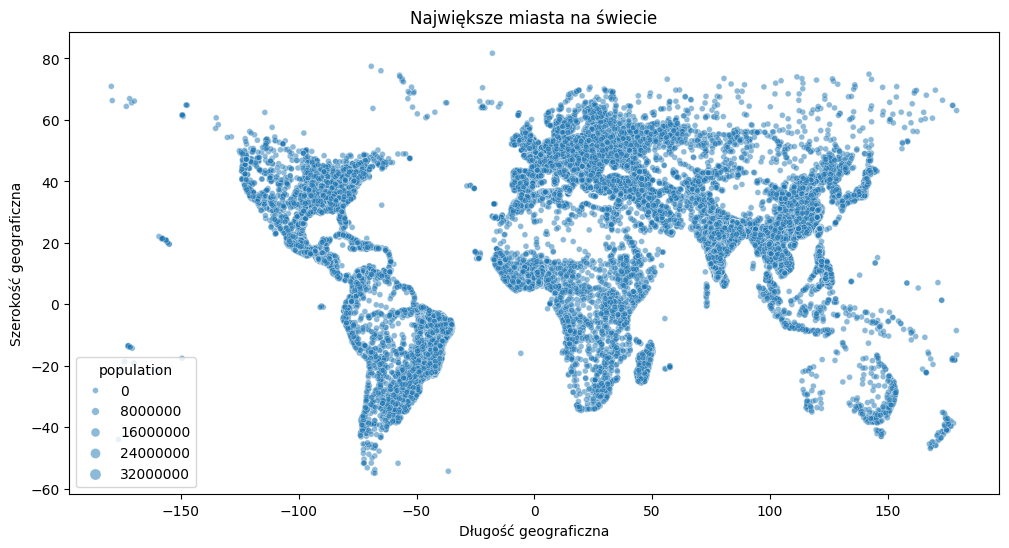

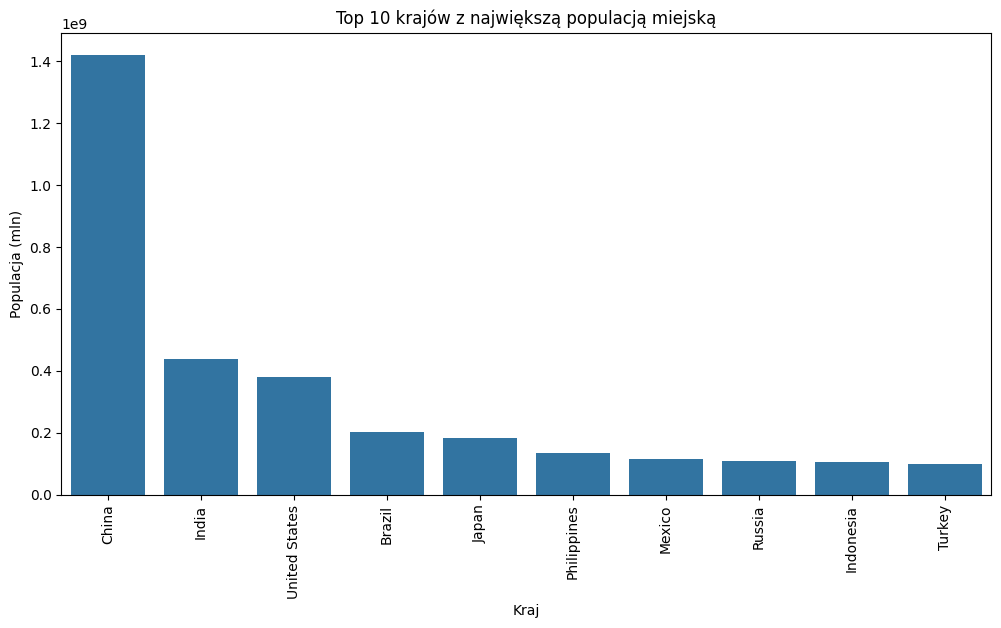

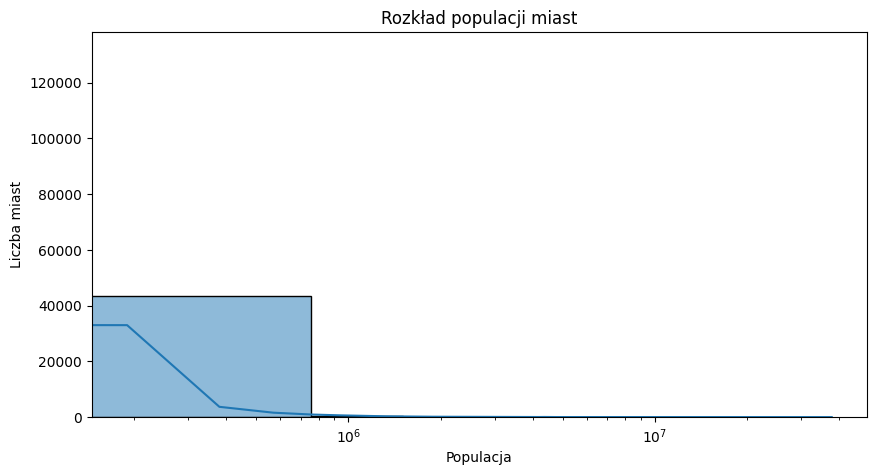

In [10]:
import zipfile
import io


url = "https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.76.zip"
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
    with zip_ref.open("worldcities.csv") as file:
        df = pd.read_csv(file)


plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["lng"], y=df["lat"], size=df["population"], alpha=0.5)
plt.title("Największe miasta na świecie")
plt.xlabel("Długość geograficzna")
plt.ylabel("Szerokość geograficzna")
plt.show()


top_countries = df.groupby("country")["population"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.xticks(rotation=90)
plt.title("Top 10 krajów z największą populacją miejską")
plt.xlabel("Kraj")
plt.ylabel("Populacja (mln)")
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(df["population"], bins=50, kde=True)
plt.xscale("log")  
plt.title("Rozkład populacji miast")
plt.xlabel("Populacja")
plt.ylabel("Liczba miast")
plt.show()

